In [1]:
import requests 
import pandas as pd
import numpy as np
import math
import os 
from statistics import mean, median, mode
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
MAX_RECORDS = 200
latmin = 43.6406
latmax = 43.736439
lngmax = -79.252357       
lngmin = -79.549301
records = 2000
x = 2000
records_per_page = min(records, MAX_RECORDS)
pages = math.ceil(records / MAX_RECORDS)

maindf = pd.DataFrame({"Address":''},index=[np.arange(0, records)])
maindf["Latitude"]=""
maindf["Longitude"]=""
maindf["Sale_Price"]= ""    
maindf['Mls Number']=""

for page in np.arange(pages):
    url = 'https://api2.realtor.ca/Listing.svc/PropertySearch_Post'
    body = {
        "CultureId":1,
        "ApplicationId":1,
        "PropertySearchTypeId":1,
        "TransactionTypeID":2,
        "BuildingTypeId":0,
        "LongitudeMin":f'{lngmin}',
        "LongitudeMax":f'{lngmax}',
        "LatitudeMin":f'{latmin}',
        "LatitudeMax":f'{latmax}',
        "PriceMin":400000,
        "RecordsPerPage": records_per_page,
        "CurrentPage": page + 1
    }

    response = requests.post(url, data=body).json() 
    
    for index, mls_post in enumerate(response['Results']):
        if page > 0:
            index += (MAX_RECORDS * x)
            
        try:                        
            lng = float(mls_post['Property']['Address']['Longitude'])
            address = mls_post['Property']['Address']
    
            if (lng >= lngmin and lng <= lngmax and address['AddressText'] not in maindf['Address'].unique()):
                maindf.loc[index, "Latitude"] = address['Latitude']  
                maindf.loc[index, "Longitude"] = address['Longitude']
                maindf.loc[index,"Address"] = address['AddressText']        
                maindf.loc[index,"Mls Number"]= mls_post['MlsNumber']
                    
                try:
                    maindf.loc[index,"Sale_Price"] = mls_post['Property']['Price']
                except:
                    maindf.loc[index,"Sale_Price"] = ""     
                
        except Exception as e:
            print('Error ', e)  
            
maindfclean = maindf.loc[maindf['Address']!="",:]


In [3]:
maindfclean[maindfclean['Address'] == ""]
maindfclean['Address'].count()

399

In [4]:
maindfclean = maindf.loc[maindf['Address']!="",:]
maindfclean.set_index('Mls Number')
maindfclean.head()

,Address,Latitude,Longitude,Sale_Price,Mls Number
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"$405,000",C4626883
1,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"$409,000",C4601721
2,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"$409,000",W4477656
3,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"$409,000",30742356
4,"#711 -236 ALBION RD|Toronto, Ontario M9W6A6",43.7220286,-79.5437092,"$409,000",W4618471


In [5]:
maindfclean.count()

Address       399
Latitude      399
Longitude     399
Sale_Price    399
Mls Number    399
dtype: int64

In [6]:
#mls_post

In [7]:
#maindfclean.Address

In [8]:
maindfclean['Sale_Price'] = maindfclean['Sale_Price'].str[1:]
maindfclean.head()

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Address,Latitude,Longitude,Sale_Price,Mls Number
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"405,000",C4626883
1,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"409,000",C4601721
2,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"409,000",W4477656
3,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"409,000",30742356
4,"#711 -236 ALBION RD|Toronto, Ontario M9W6A6",43.7220286,-79.5437092,"409,000",W4618471


In [9]:
maindfclean['Postal_Code']=maindfclean['Address'].str[-6:]
maindfclean['Postal code prefix']=maindfclean['Postal_Code'].str[:3]
maindfclean.head()

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Address,Latitude,Longitude,Sale_Price,Mls Number,Postal_Code,Postal code prefix
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"405,000",C4626883,M5A3H6,M5A
1,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"409,000",C4601721,M5A4R6,M5A
2,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"409,000",W4477656,M6M5B3,M6M
3,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"409,000",30742356,M6M5B3,M6M
4,"#711 -236 ALBION RD|Toronto, Ontario M9W6A6",43.7220286,-79.5437092,"409,000",W4618471,M9W6A6,M9W


In [15]:
cwd = os.getcwd()
print (cwd)
csvpath_one = "Postal_code_GTA.csv"
PostalCode_df = pd.read_csv(csvpath_one)
PostalCode_df.head()

C:\Users\pasqu\OneDrive\Documents\Hot-Hotter-Hottest\Pasquale


,Postal code prefix,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


In [16]:
merge_table_df= pd.merge(maindfclean,PostalCode_df,on="Postal code prefix")
merge_table_df.head()

,Address,Latitude,Longitude,Sale_Price,Mls Number,Postal_Code,Postal code prefix,Borough,Neighbourhood
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"405,000",C4626883,M5A3H6,M5A,Downtown Toronto,Harbourfront
1,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"405,000",C4626883,M5A3H6,M5A,Downtown Toronto,Regent Park
2,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"409,000",C4601721,M5A4R6,M5A,Downtown Toronto,Harbourfront
3,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"409,000",C4601721,M5A4R6,M5A,Downtown Toronto,Regent Park
4,"#835 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"439,900",C4628750,M5A4R6,M5A,Downtown Toronto,Harbourfront


In [17]:
merge_table_df['Sale_Price'] = merge_table_df['Sale_Price'].str.replace(',', '')
merge_table_df['Sale_Price'] = merge_table_df['Sale_Price'].astype(int)
merge_table_df.head()


,Address,Latitude,Longitude,Sale_Price,Mls Number,Postal_Code,Postal code prefix,Borough,Neighbourhood
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,405000,C4626883,M5A3H6,M5A,Downtown Toronto,Harbourfront
1,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,405000,C4626883,M5A3H6,M5A,Downtown Toronto,Regent Park
2,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,409000,C4601721,M5A4R6,M5A,Downtown Toronto,Harbourfront
3,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,409000,C4601721,M5A4R6,M5A,Downtown Toronto,Regent Park
4,"#835 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,439900,C4628750,M5A4R6,M5A,Downtown Toronto,Harbourfront


In [18]:
Price_df= merge_table_df.groupby(['Borough'])
Avg_Price = Price_df["Sale_Price"].mean().astype(int)
print(Avg_Price)

Borough
Central Toronto     1554578
Downtown Toronto    1215672
East Toronto        1804055
East York           1656146
Etobicoke           1596759
North York           977130
Scarborough         1441717
West Toronto        1290988
York                 977223
Name: Sale_Price, dtype: int32


In [19]:
# Convert to DataFrame
Price_df =pd.DataFrame({"Sale_Price": Avg_Price})
Price_sorted_df =Price_df.sort_values(["Borough"], ascending=True).reset_index()

# Preview DataFrame
Price_sorted_df.head()


,Borough,Sale_Price
0,Central Toronto,1554578
1,Downtown Toronto,1215672
2,East Toronto,1804055
3,East York,1656146
4,Etobicoke,1596759


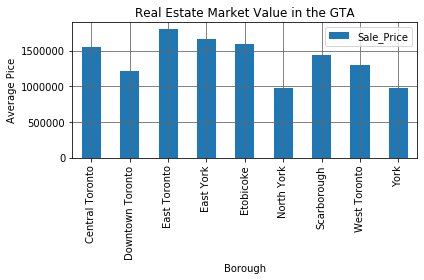

In [20]:
Price_sorted_df.plot(x ='Borough', y='Sale_Price', kind = 'bar')
plt.title("Real Estate Market Value in the GTA")
plt.ylabel("Average Pice")
plt.xlabel("Borough")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(loc=0)

# Show the Figure
plt.show
plt.tight_layout()


In [26]:
Count_df= merge_table_df.groupby(['Borough'])
Count = Price_df["Sale_Price"].count()
print(Count)

Borough
Central Toronto     110
Downtown Toronto    273
East Toronto         29
East York            21
Etobicoke            58
North York          176
Scarborough          32
West Toronto         85
York                 83
Name: Sale_Price, dtype: int64


In [35]:
# Convert to DataFrame
Count_df =pd.DataFrame({"Volume": Count})
Count_sorted_df =Count_df.sort_values(["Borough"], ascending=True).reset_index()


# Preview DataFrame
Count_sorted_df.head()

,Borough,Volume
0,Central Toronto,110
1,Downtown Toronto,273
2,East Toronto,29
3,East York,21
4,Etobicoke,58


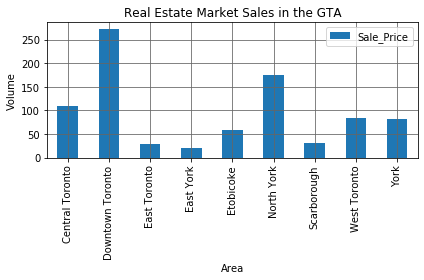

In [36]:
Volume_sorted_df.plot(x ='Borough', y='Sale_Price', kind = 'bar')
plt.title("Real Estate Market Sales in the GTA")
plt.ylabel("Volume")
plt.xlabel("Area")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(loc=0)

# Show the Figure
plt.show
plt.tight_layout()
